In [ ]:
pip install mglearn

     |████████████████████████████████| 542kB 7.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=da5ca66114258ef00cdb24f44c2eab028e3297d62556231f468ac9c6ffb2334b
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
from sklearn.neural_network import MLPClassifier

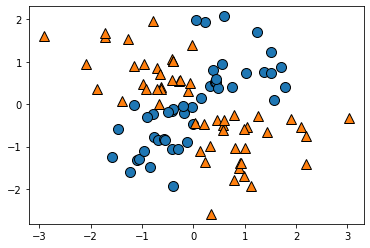

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import mglearn

#200개의 데이터, feature = 2개
np.random.seed(30)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y = np.where(y, 1, -1)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)

In [ ]:
model_pctr = MLPClassifier(hidden_layer_sizes=()) #단일 퍼셉트론

In [ ]:
model_pctr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
model_pctr.score(X_train, y_train)

0.35

In [ ]:
model_pctr.score(X_test, y_test)

0.45

#### parameter 
- activation  
1) default : relu  
2) logistic  
3) tanh (sigmoid 일종)  
4) indentity : linear  
  
- solver   
1) default : adam  
2) lbfgs   
3) sgd : stochastic(확률적) gradient decent  
  
- alpha : l2 norm 규제 정도 (Ridge regression과 동일)
  
- tol : cost 가 학습을 멈추는 기준 값 (cost = tol 일 될때까지)
  
- max_iter : optimizing 최대 반복 수

In [ ]:
model_pctr.coefs_

[array([[-0.44017992],
        [ 0.66420849]])]

In [ ]:
model_pctr.intercepts_

[array([0.40176013])]

In [ ]:
#각 층의 coef 개수
for i, coef in enumerate(model_pctr.coefs_):
    print('hidden_layer_{}_weight_no: {}'.format(i, coef.shape))

hidden_layer_0_weight_no: (2, 1)


In [ ]:
#graph, dataset 확장 패키지
def result_visualization(model, X, y):
    mglearn.plots.plot_2d_separator(model, X,
                                    fill=True, alpha=.1)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

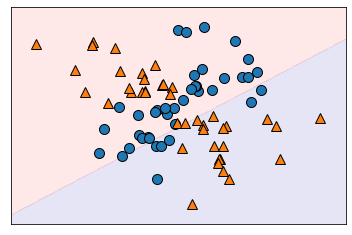

In [ ]:
result_visualization(model_pctr, X_train, y_train)

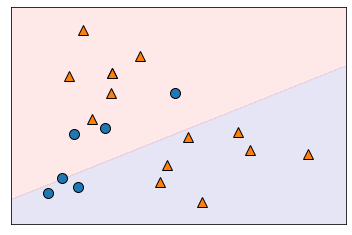

In [ ]:
result_visualization(model_pctr, X_test, y_test)